In [1]:
# Let's first load and inspect the contents of the uploaded file.
import pandas as pd

# Load the dataset
file_path = 'heart_disease_uci.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
df.head()


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


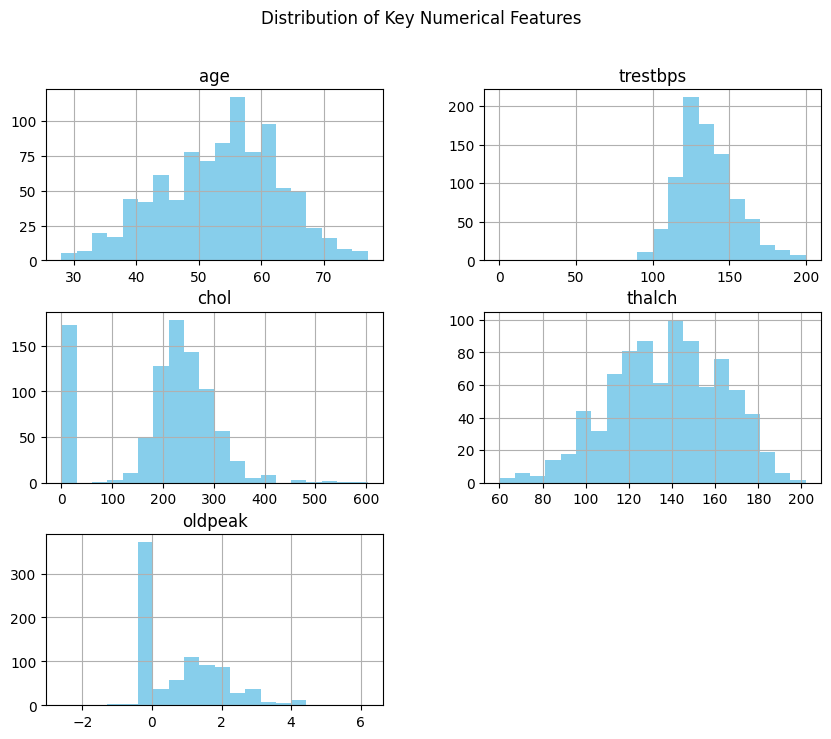

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Checking for missing values
missing_values = df.isnull().sum()

# Visualize the distribution of a few numerical columns
numerical_columns = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
df[numerical_columns].hist(figsize=(10,8), bins=20, color='skyblue')
plt.suptitle('Distribution of Key Numerical Features')
plt.show()

# Check for missing values and display them
missing_values


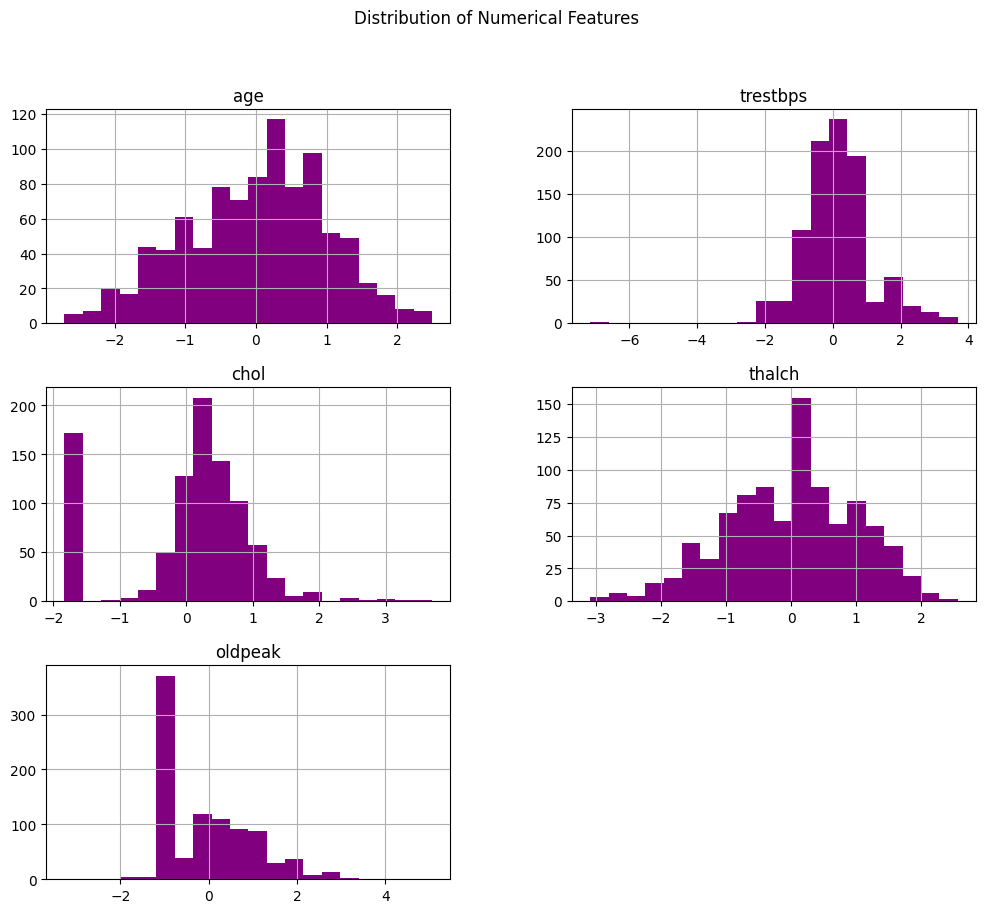

In [8]:
# Visualize distribution of numerical columns
df[numerical_columns].hist(figsize=(12, 10), bins=20, color='purple')
plt.suptitle('Distribution of Numerical Features')
plt.show()


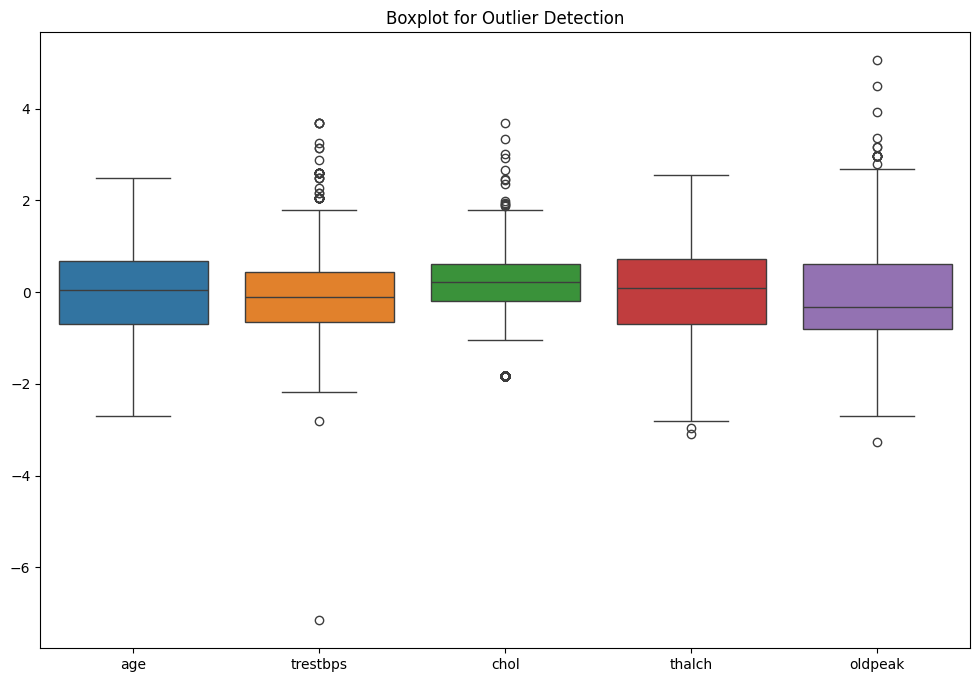

In [11]:
# Boxplots to detect outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[numerical_columns])
plt.title('Boxplot for Outlier Detection')
plt.show()


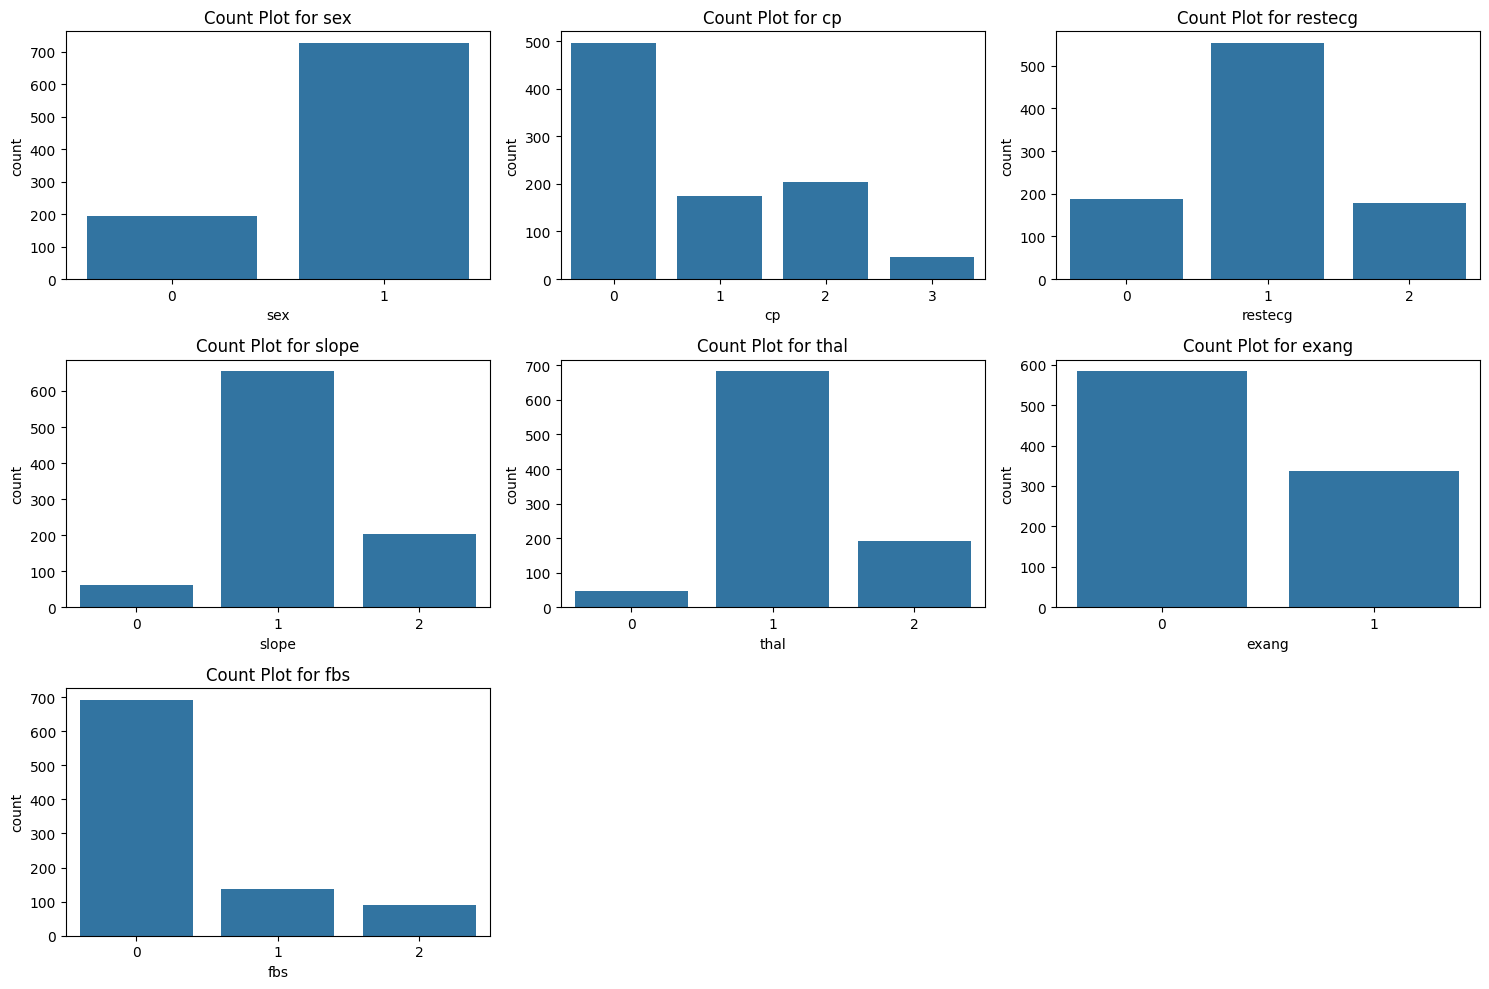

In [12]:
# Count plots for categorical variables
categorical_columns = ['sex', 'cp', 'restecg', 'slope', 'thal', 'exang', 'fbs']
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=col, data=df)
    plt.title(f'Count Plot for {col}')
plt.tight_layout()
plt.show()


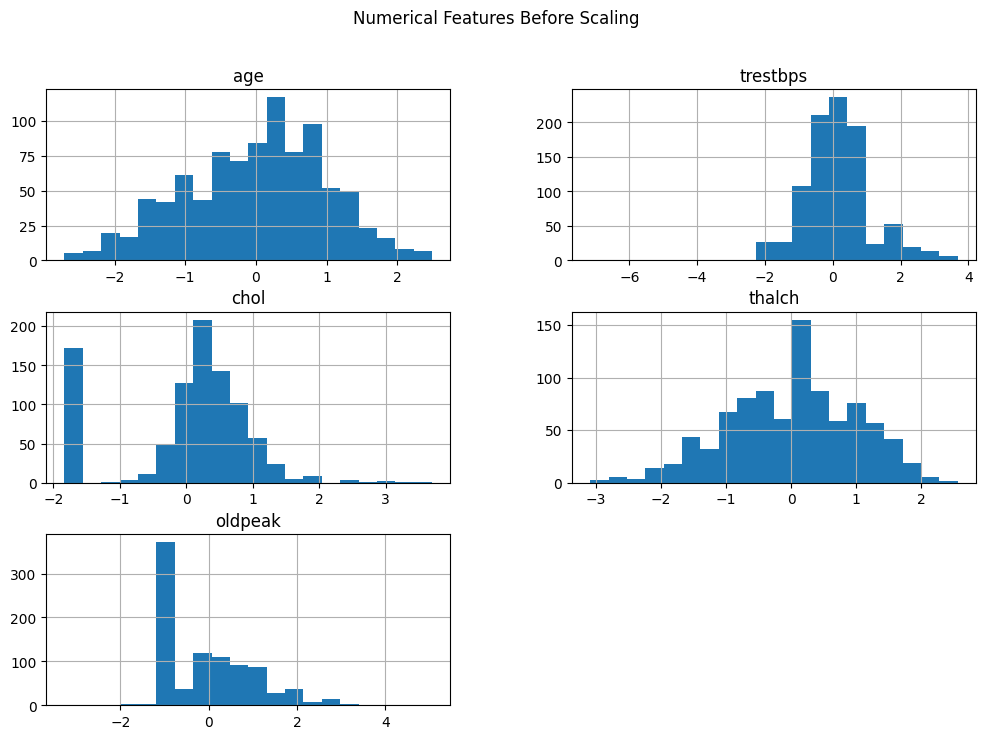

In [13]:
# Visualizing data before scaling
df[numerical_columns].hist(figsize=(12, 8), bins=20)
plt.suptitle('Numerical Features Before Scaling')
plt.show()


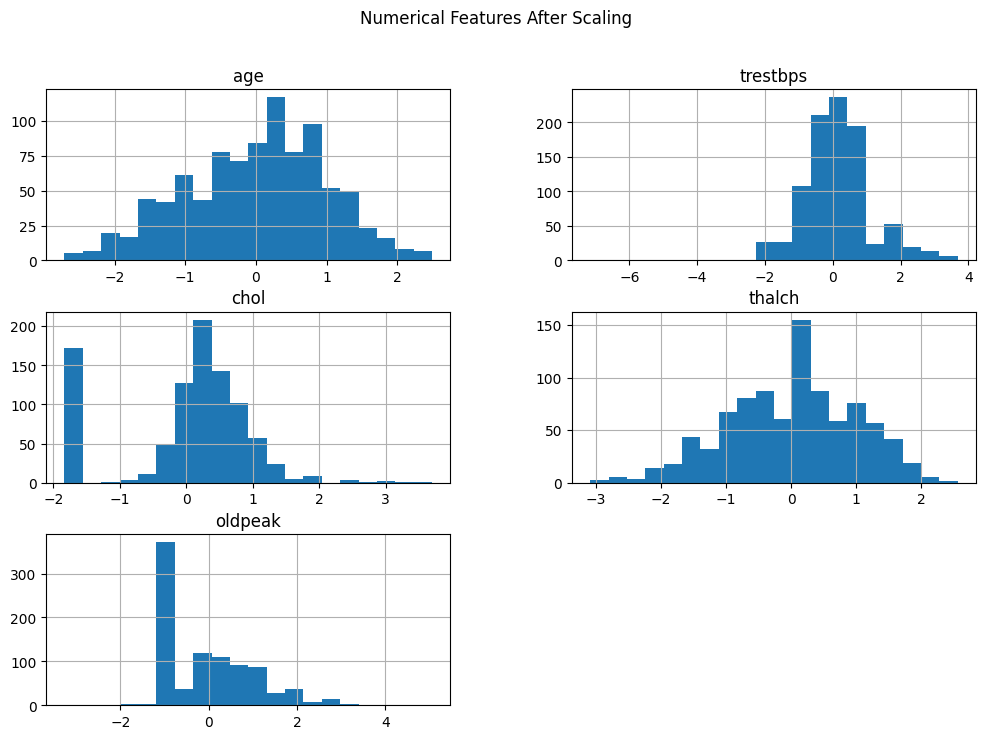

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Visualizing data after scaling
df[numerical_columns].hist(figsize=(12, 8), bins=20)
plt.suptitle('Numerical Features After Scaling')
plt.show()


In [15]:
# Correlation threshold-based feature selection
corr_matrix = df.corr().abs()
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Drop features with high correlation
highly_correlated_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.85)]

print(f'Highly Correlated Features to Drop: {highly_correlated_features}')


ValueError: could not convert string to float: 'Cleveland'

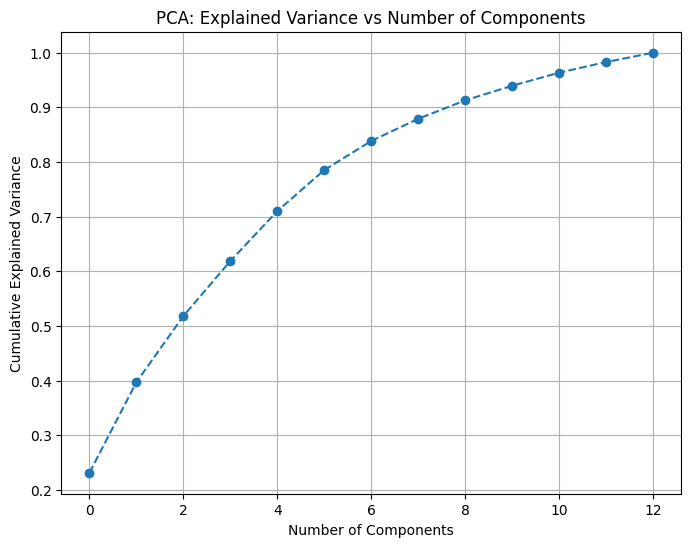

In [17]:
import numpy as np
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(X_train)

plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA: Explained Variance vs Number of Components')
plt.grid(True)
plt.show()


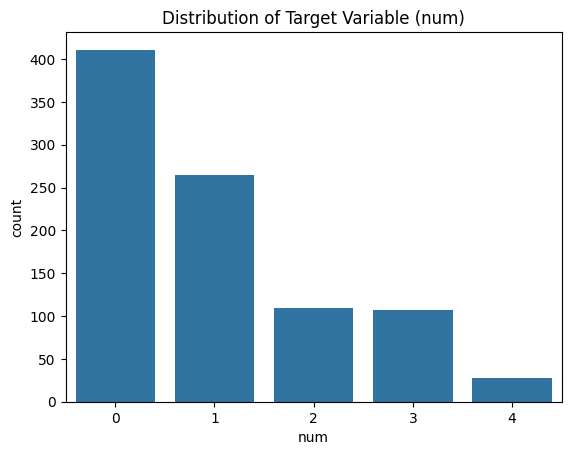

In [18]:
# Plotting target variable distribution to check for imbalance
sns.countplot(x='num', data=df)
plt.title('Distribution of Target Variable (num)')
plt.show()


In [3]:
# Impute missing values
# Numerical columns - fill with median
df['trestbps'].fillna(df['trestbps'].median(), inplace=True)
df['chol'].fillna(df['chol'].median(), inplace=True)
df['thalch'].fillna(df['thalch'].median(), inplace=True)
df['oldpeak'].fillna(df['oldpeak'].median(), inplace=True)

# Categorical columns - fill with mode
df['restecg'].fillna(df['restecg'].mode()[0], inplace=True)
df['exang'].fillna(df['exang'].mode()[0], inplace=True)
df['slope'].fillna(df['slope'].mode()[0], inplace=True)
df['ca'].fillna(df['ca'].mode()[0], inplace=True)
df['thal'].fillna(df['thal'].mode()[0], inplace=True)

# Encode categorical columns
categorical_columns = ['sex', 'cp', 'restecg', 'slope', 'thal', 'exang', 'fbs']

# Label encoding
le = LabelEncoder()
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

# Feature scaling
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Visualize the cleaned dataset after imputing missing values
df.head()


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,1.007386,1,Cleveland,3,0.705176,0.303643,1,0,0.489727,0,1.368109,0,0.0,0,0
1,2,1.432034,1,Cleveland,0,1.518569,0.789967,0,0,-1.181478,1,0.611589,1,3.0,1,2
2,3,1.432034,1,Cleveland,0,-0.650479,0.266939,0,0,-0.345875,1,1.651804,1,2.0,2,1
3,4,-1.752828,1,Cleveland,2,-0.108217,0.459634,0,1,1.961979,0,2.502889,0,0.0,1,0
4,5,-1.328180,0,Cleveland,1,-0.108217,0.037541,0,0,1.365120,0,0.517024,2,0.0,1,0


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Drop the 'id' and 'dataset' columns since they are not useful for modeling
X = df.drop(columns=['id', 'dataset', 'num'])
y = df['num']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
log_reg = LogisticRegression(max_iter=1000)
rf_clf = RandomForestClassifier(random_state=42)
gb_clf = GradientBoostingClassifier(random_state=42)

# Train models
log_reg.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)
gb_clf.fit(X_train, y_train)

# Predictions
y_pred_log_reg = log_reg.predict(X_test)
y_pred_rf = rf_clf.predict(X_test)
y_pred_gb = gb_clf.predict(X_test)

# Evaluation: accuracy score and classification report
log_reg_report = classification_report(y_test, y_pred_log_reg)
rf_report = classification_report(y_test, y_pred_rf)
gb_report = classification_report(y_test, y_pred_gb)

# Accuracy scores
log_reg_acc = accuracy_score(y_test, y_pred_log_reg)
rf_acc = accuracy_score(y_test, y_pred_rf)
gb_acc = accuracy_score(y_test, y_pred_gb)

log_reg_acc, rf_acc, gb_acc


C:\Users\prith\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\prith\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\prith\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

(0.5543478260869565, 0.5760869565217391, 0.5869565217391305)

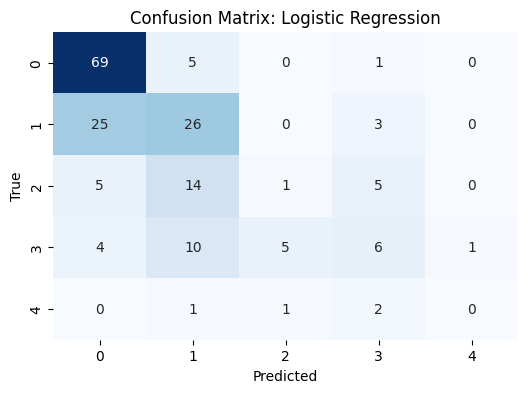

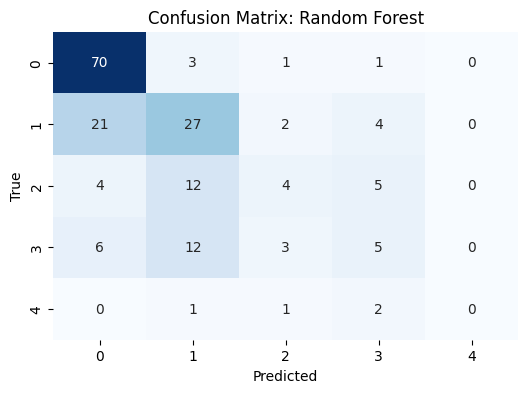

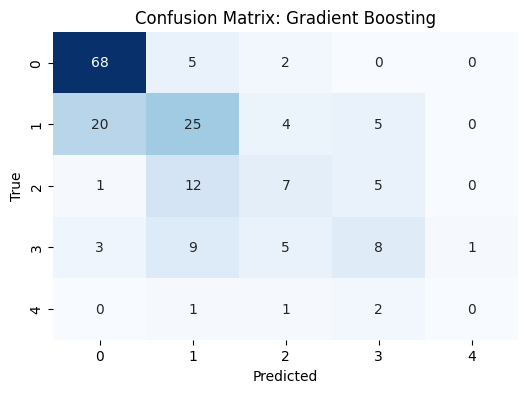

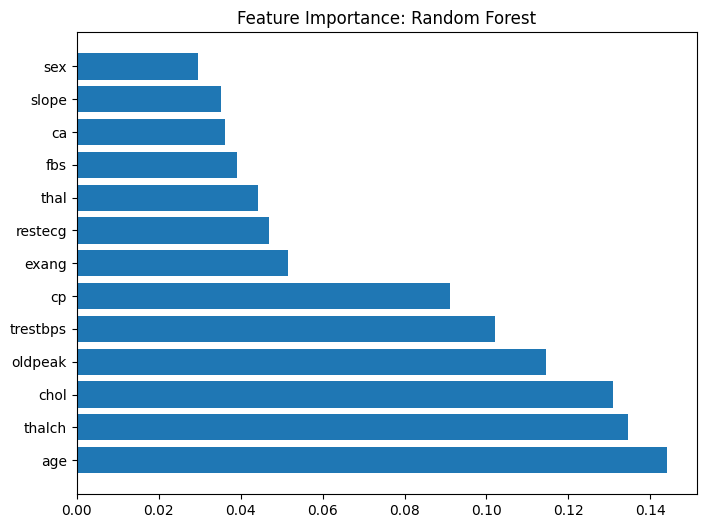

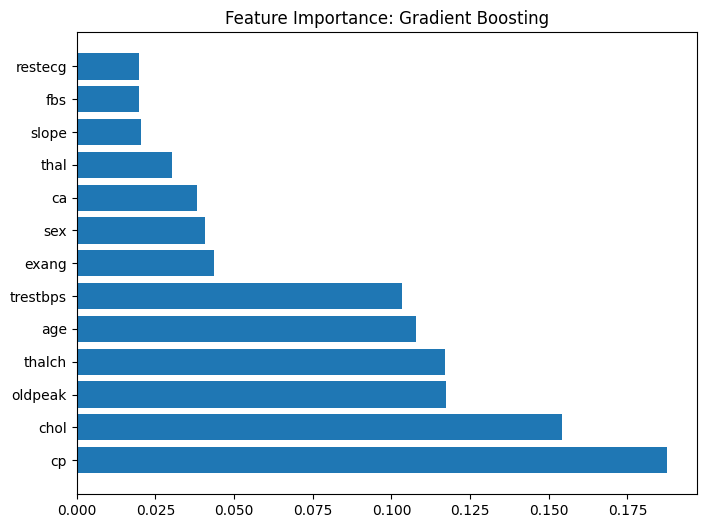

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f'Confusion Matrix: {title}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Confusion matrices for all models
plot_confusion_matrix(y_test, y_pred_log_reg, "Logistic Regression")
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")
plot_confusion_matrix(y_test, y_pred_gb, "Gradient Boosting")

# Feature importance for Random Forest and Gradient Boosting
def plot_feature_importance(model, X_train, title):
    importance = model.feature_importances_
    features = X_train.columns
    indices = importance.argsort()[::-1]

    plt.figure(figsize=(8, 6))
    plt.barh(range(len(indices)), importance[indices], align='center')
    plt.yticks(range(len(indices)), [features[i] for i in indices])
    plt.title(f'Feature Importance: {title}')
    plt.show()

# Plot feature importance
plot_feature_importance(rf_clf, X_train, "Random Forest")
plot_feature_importance(gb_clf, X_train, "Gradient Boosting")
